In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import random
import torch
import torchaudio

from tqdm.notebook import tqdm

from model.binary import *

In [3]:
device = torch.device(f'cuda:0' if torch.cuda.is_available() else 'cpu')

audio_file = 'data/audio/20190819-Kutna Hora-L4-out-MVI_0040.wav'
labels_file = 'data/labels/20190819-Kutna Hora-L4-out-MVI_0040.txt'

signal, sr = torchaudio.load(audio_file)
signal = signal.mean(0)
# signal = signal.to(device)

events = np.loadtxt(labels_file)

In [ ]:
model = ResNet18().to(device)

weights = torch.load(f'weights/multi/model_1627302338.pth', device)
model.load_state_dict(weights)

In [ ]:
dataset = VehicleDataset(audio_file, labels_file)

In [11]:
results = []

offset = 0.5
start_time = 25 * 60
T = 9 * 60

frame_len = 1.0
n_samples_per_frame = int(sr * frame_len)

X = np.linspace(0, T, int(T))

model.eval()
with torch.no_grad():
    for t in tqdm(X):
        
        t = int((t + start_time + offset) * sr)
    
        s = signal[t: t + n_samples_per_frame]
        s = dataset.transform(s)
        s = s.unsqueeze(0).to(device)
        y = model(s)
        y = torch.argmax(y).item()
        
        results.append(y)

  0%|          | 0/540 [00:00<?, ?it/s]

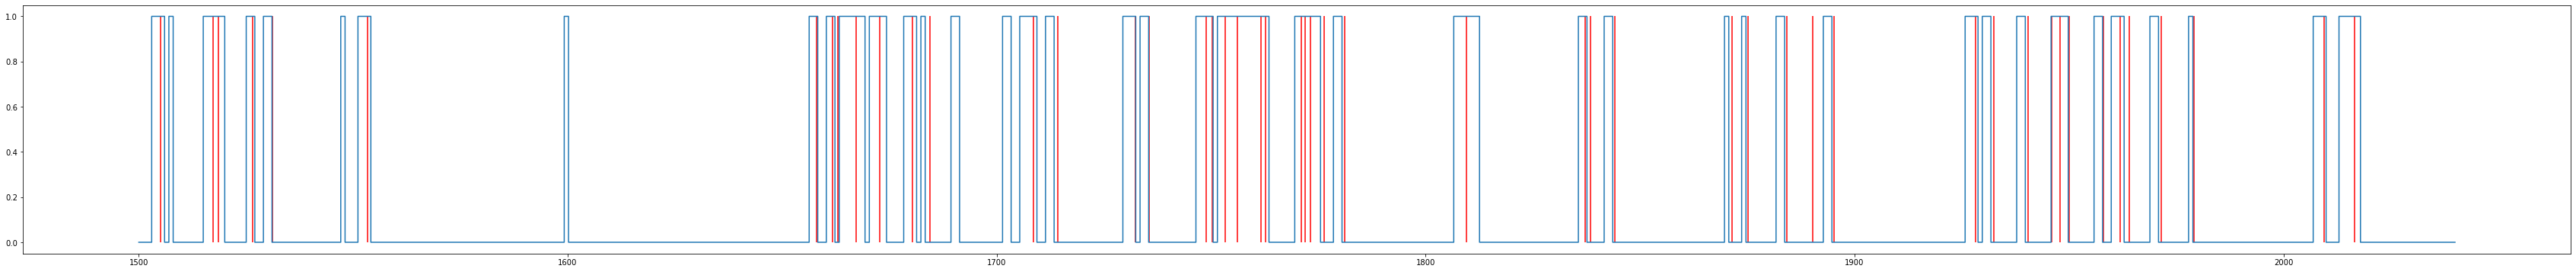

In [12]:
plt.figure(figsize=(60, 6))
plt.step(X + start_time, results);

for event in events[(events >= start_time) & (events < start_time + T)]:
    plt.vlines(event, 0, 1, color='r')

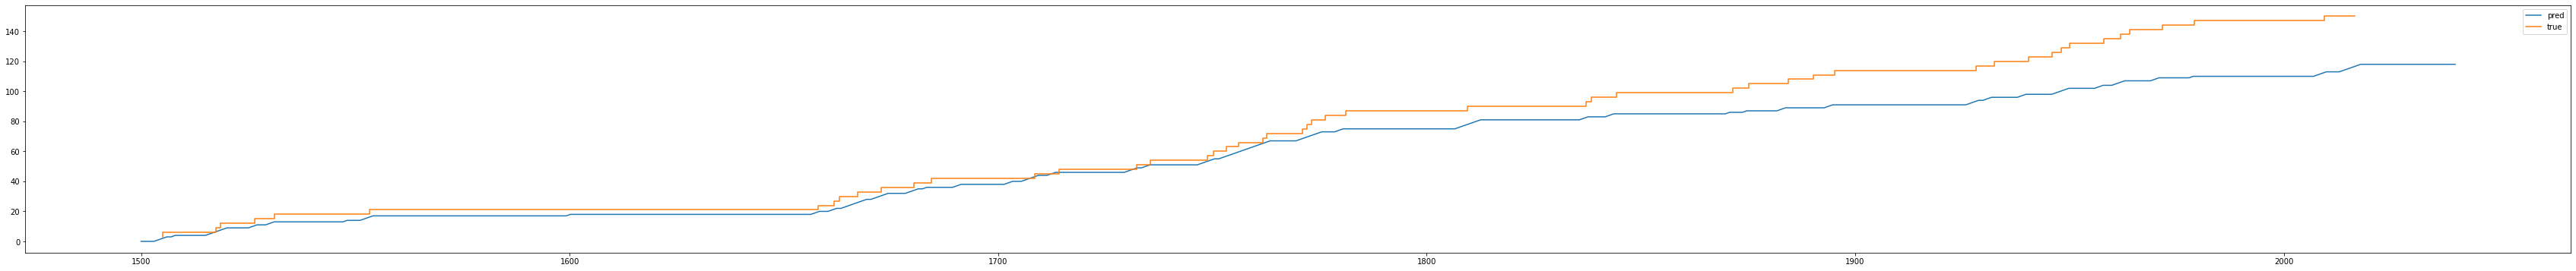

In [13]:
cumsum = np.cumsum(results)

fig, ax1 = plt.subplots(figsize=(60, 6))

ax1.plot(X + start_time, cumsum, label='pred')

E = events[(events >= start_time) & (events < start_time + T)]

ax1.step(E, (np.arange(len(E)) + 1) * 3, label='true')

plt.legend();